# Scikit-learn

![img](imgs/scikit_learn_1.PNG)

In [1]:
import os
import numpy as np
import pandas as pd
import sklearn

# classification

### 데이터 읽기 (Titanic dataset)
https://www.kaggle.com/c/titanic/overview

In [2]:
data_path = './data/titanic/'

train_data_path = os.path.join(data_path, 'train.csv')
test_data_path = os.path.join(data_path, 'test.csv')

train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
"""
test data에는 label(Survivded)이 존재하지 않습니다.
따라서, 이번 실습에서는 모든 label이 제공되는 train dataset을 이용해 train / validation / test 데이터셋으로 구분하여 진행하도록 하겠습니다.
"""
test_df.head() 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 데이터 전처리

![](imgs/titanic_features.PNG)

In [6]:
# 1. 사용할 feature만 indexing해줍니다.
input_features = ['Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Cabin', 'Embarked']
output_features = ['Survived']

X = train_df[input_features]
y = train_df[output_features]

In [7]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,NaN,S
887,1,female,19.0,0,0,30.0000,B42,S
888,3,female,NaN,1,2,23.4500,NaN,S
889,1,male,26.0,0,0,30.0000,C148,C


In [8]:
# 2. float 로 표시할 수 없는 값들을 모델에 입력 가능한 값으로 변환해줍니다.

# 2-1. nan 값 처리 - 여기서는 -1 값을 입력하도록 하겠습니다.
X = X.fillna(-1)


# 2-2. category로 표시 가능한 값들은 0부터 시작하는 index로 변환해줍니다.
X['Sex'] = X['Sex'].astype('category').cat.codes
X['Cabin'] = X['Cabin'].astype('category').cat.codes
X['Embarked'] = X['Embarked'].astype('category').cat.codes

In [9]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,0,3
1,1,0,38.0,1,0,71.2833,82,1
2,3,0,26.0,0,0,7.9250,0,3
3,1,0,35.0,1,0,53.1000,56,3
4,3,1,35.0,0,0,8.0500,0,3
...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0,3
887,1,0,19.0,0,0,30.0000,31,3
888,3,0,-1.0,1,2,23.4500,0,3
889,1,1,26.0,0,0,30.0000,61,1


In [10]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


### 학습 데이터 train / validation / test split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [13]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((569, 8), (569, 1), (143, 8), (143, 1), (179, 8), (179, 1))

### 모델 선정 및 학습
https://scikit-learn.org/stable/supervised_learning.html#supervised-learning

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='none') # 모델 선정
model.fit(X_train, y_train) # 모델 학습

C:\Users\chahn\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\chahn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
pred = model.predict(X_val) # 모델 예측

In [17]:
model.score(X_val, y_val) # validation 성능 측정

0.7762237762237763

In [18]:
model.score(X_test, y_test) # test 성능 측정

0.7932960893854749

- 다른 모델을 구현해봅시다.

In [19]:
# Support vector machine
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

C:\Users\chahn\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
model.score(X_val, y_val)

0.6503496503496503

In [22]:
model.score(X_test, y_test)

0.6983240223463687

# Regression

### 데이터 읽기 (house prices 데이터셋)
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

In [23]:
data_path = './data/house-prices-advanced-regression-techniques/'

train_df = pd.read_csv(os.path.join(data_path, 'train.csv'))
test_df = pd.read_csv(os.path.join(data_path, 'test.csv'))

In [24]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [25]:
test_df # 타이타닉 데이터셋과 마찬가지로 label(SalePrice)이 없기 때문에 학습데이터를 이용하여 실습하도록 하겠습니다.

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


### 데이터 전처리

In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [27]:
train_df = train_df.fillna(-1) # nan 값으로 -1을 채워주겠습니다.

In [28]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,-1,Reg,Lvl,AllPub,...,0,-1,-1,-1,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,-1,Reg,Lvl,AllPub,...,0,-1,-1,-1,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,-1,IR1,Lvl,AllPub,...,0,-1,-1,-1,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,-1,IR1,Lvl,AllPub,...,0,-1,-1,-1,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,-1,IR1,Lvl,AllPub,...,0,-1,-1,-1,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,-1,Reg,Lvl,AllPub,...,0,-1,-1,-1,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,-1,Reg,Lvl,AllPub,...,0,-1,MnPrv,-1,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,-1,Reg,Lvl,AllPub,...,0,-1,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,-1,Reg,Lvl,AllPub,...,0,-1,-1,-1,0,4,2010,WD,Normal,142125


In [29]:
# float value 혹은 categorical의 형태로 만들어줍니다.
for column in train_df.columns:
    if train_df[column].dtype == 'object':
        train_df[column] = train_df[column].astype('category').cat.codes

In [30]:
# input feature 와 output feature를 구분해줍니다.
X = train_df[[i for i in train_df.columns if i not in ['SalePrice', 'Id']]]
y = train_df[['SalePrice']]

In [31]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,0,3,3,0,4,...,0,0,0,0,0,0,2,2008,8,4
1,20,3,80.0,9600,1,0,3,3,0,2,...,0,0,0,0,0,0,5,2007,8,4
2,60,3,68.0,11250,1,0,0,3,0,4,...,0,0,0,0,0,0,9,2008,8,4
3,70,3,60.0,9550,1,0,0,3,0,0,...,0,0,0,0,0,0,2,2006,8,0
4,60,3,84.0,14260,1,0,0,3,0,2,...,0,0,0,0,0,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,0,3,3,0,4,...,0,0,0,0,0,0,8,2007,8,4
1456,20,3,85.0,13175,1,0,3,3,0,4,...,0,0,0,3,0,0,2,2010,8,4
1457,70,3,66.0,9042,1,0,3,3,0,4,...,0,0,0,1,3,2500,5,2010,8,4
1458,20,3,68.0,9717,1,0,3,3,0,4,...,0,0,0,0,0,0,4,2010,8,4


In [32]:
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


### 데이터 스플릿

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [38]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((934, 79), (934, 1), (234, 79), (234, 1), (292, 79), (292, 1))

### 데이터 normalize

In [39]:
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
scalerY = StandardScaler()

In [40]:
scalerX.fit(X_train)
scalerY.fit(y_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [41]:
scalerX.mean_, scalerX.var_

(array([5.71788009e+01, 3.05032120e+00, 5.67858672e+01, 1.07702602e+04,
        9.96788009e-01, 9.20770878e-02, 1.92719486e+00, 2.78800857e+00,
        1.07066381e-03, 2.93790150e+00, 6.53104925e-02, 1.22708779e+01,
        2.01070664e+00, 2.01284797e+00, 4.83940043e-01, 3.05674518e+00,
        6.10706638e+00, 5.60278373e+00, 1.97042291e+03, 1.98473448e+03,
        1.43897216e+00, 1.06852248e+00, 9.65096360e+00, 1.03982869e+01,
        2.74411135e+00, 1.03765525e+02, 2.53854390e+00, 3.70556745e+00,
        1.40149893e+00, 3.20021413e+00, 3.71734475e+00, 3.19700214e+00,
        3.62098501e+00, 4.52292291e+02, 5.60064240e+00, 4.38608137e+01,
        5.65693790e+02, 1.06184690e+03, 1.03961456e+00, 1.57387580e+00,
        9.28265525e-01, 4.68629550e+00, 1.16972805e+03, 3.54776231e+02,
        5.56852248e+00, 1.53007281e+03, 4.23982869e-01, 6.20985011e-02,
        1.56745182e+00, 3.77944325e-01, 2.90256959e+00, 1.04710921e+00,
        2.33618844e+00, 6.59528908e+00, 5.71948608e+00, 6.295503

In [42]:
scalerY.mean_, scalerY.var_

(array([181034.54068522]), array([5.83864132e+09]))

In [43]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,0,3,3,0,4,...,0,0,0,0,0,0,2,2008,8,4
1,20,3,80.0,9600,1,0,3,3,0,2,...,0,0,0,0,0,0,5,2007,8,4
2,60,3,68.0,11250,1,0,0,3,0,4,...,0,0,0,0,0,0,9,2008,8,4
3,70,3,60.0,9550,1,0,0,3,0,0,...,0,0,0,0,0,0,2,2006,8,0
4,60,3,84.0,14260,1,0,0,3,0,2,...,0,0,0,0,0,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,0,3,3,0,4,...,0,0,0,0,0,0,8,2007,8,4
1456,20,3,85.0,13175,1,0,3,3,0,4,...,0,0,0,3,0,0,2,2010,8,4
1457,70,3,66.0,9042,1,0,3,3,0,4,...,0,0,0,1,3,2500,5,2010,8,4
1458,20,3,68.0,9717,1,0,3,3,0,4,...,0,0,0,0,0,0,4,2010,8,4


In [45]:
pd.DataFrame(scalerX.transform(X_train))

,0,1,2,3,4,5,6,7,8,9,...,69,70,71,72,73,74,75,76,77,78
0,1.479856,1.601007,-0.357174,-0.519536,0.056766,-0.248646,-1.363810,-2.581616,-0.032739,0.639735,...,2.508497,-0.07944,-0.074409,-0.458609,-0.203736,-0.119024,2.092541,-0.613566,0.312117,-0.702213
1,3.128820,-0.084834,0.508813,0.073762,0.056766,-0.248646,0.759188,0.306084,-0.032739,0.639735,...,-0.275752,-0.07944,-0.074409,-0.458609,-0.203736,-0.119024,-0.886778,1.639660,0.312117,0.213802
2,1.479856,-0.084834,-1.614253,-0.653643,0.056766,-0.248646,0.759188,0.306084,-0.032739,0.639735,...,-0.275752,-0.07944,-0.074409,-0.458609,-0.203736,-0.119024,-0.514363,-1.364641,0.312117,0.213802
3,0.773157,-0.084834,0.676424,0.092403,-17.616280,-0.248646,0.759188,0.306084,-0.032739,0.639735,...,-0.275752,-0.07944,-0.074409,-0.458609,-0.203736,-0.119024,-0.514363,-0.613566,0.312117,0.213802
4,1.479856,-0.084834,-0.692395,0.006536,0.056766,-0.248646,-1.363810,0.306084,-0.032739,-1.167259,...,-0.275752,-0.07944,-0.074409,-0.458609,-0.203736,-0.119024,-0.514363,0.137510,-3.540537,0.213802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,-0.875807,-0.084834,0.089787,-0.328817,0.056766,-0.248646,0.759188,0.306084,-0.032739,0.639735,...,-0.275752,-0.07944,-0.074409,-0.458609,4.939211,1.331129,1.720126,0.888585,0.312117,0.213802
930,-0.875807,-0.084834,0.229463,-0.172877,0.056766,-0.248646,-1.363810,0.306084,-0.032739,0.639735,...,-0.275752,-0.07944,-0.074409,-0.458609,-0.203736,-0.119024,0.230467,-1.364641,-0.972101,1.129818
931,-0.875807,-0.084834,0.369138,-0.289120,0.056766,-0.248646,0.759188,0.306084,-0.032739,0.639735,...,-0.275752,-0.07944,-0.074409,-0.458609,-0.203736,-0.119024,-0.886778,-0.613566,0.312117,0.213802
932,0.066458,-0.084834,0.648489,-0.087183,0.056766,-0.248646,0.759188,0.306084,-0.032739,0.639735,...,-0.275752,-0.07944,-0.074409,3.453178,-0.203736,-0.119024,0.230467,-0.613566,0.312117,0.213802


In [47]:
pd.DataFrame(scalerY.transform(y_train))

,0
0,0.706252
1,-0.648265
2,0.444510
3,-0.818397
4,1.871006
...,...
929,-0.792223
930,-0.209977
931,-0.641721
932,0.078071


### 모델 선정 및 학습

In [48]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() # 모델 선정
model.fit(scalerX.transform(X_train), scalerY.transform(y_train)) # 모델 학습

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
#mae가 낮으면 좋음
def mae(x,y):
    return np.mean(np.abs(x-y))

In [50]:
model.predict(X_val)

array([[-1.51186589e+14],
       [-1.22870230e+14],
       [-2.39453645e+14],
       [-1.90057371e+14],
       [-1.22218382e+14],
       [-1.06608428e+14],
       [-2.00791319e+14],
       [-7.74238901e+13],
       [-1.15570197e+14],
       [-9.66916695e+13],
       [-1.26832432e+14],
       [-1.50501438e+14],
       [-1.57842008e+14],
       [-1.72034499e+14],
       [-1.77209899e+14],
       [-2.19361329e+14],
       [-1.39241393e+14],
       [-1.48948524e+14],
       [-1.04728364e+14],
       [-9.91538312e+13],
       [-1.55301502e+14],
       [-1.78652005e+14],
       [-1.21559989e+14],
       [-1.56113322e+14],
       [-1.00948480e+14],
       [-1.46447123e+14],
       [-2.37857839e+14],
       [-1.13058058e+14],
       [-8.93673366e+13],
       [-1.23506229e+14],
       [-1.38232246e+14],
       [-1.74048505e+14],
       [-1.77465396e+14],
       [-1.59558576e+14],
       [-1.03318764e+14],
       [-9.87834068e+13],
       [-1.15073297e+14],
       [-1.20619935e+14],
       [-2.1

In [51]:
model.predict(scalerX.transform(X_val))

array([[-0.58942779],
       [ 0.17165551],
       [ 1.32720902],
       [ 0.76398876],
       [-0.12721771],
       [-1.00713278],
       [ 1.41037166],
       [-0.40166461],
       [-0.99906262],
       [-0.57135912],
       [ 0.1869802 ],
       [ 0.74061308],
       [ 0.24294541],
       [ 0.23097078],
       [ 0.89407666],
       [ 0.58424626],
       [-0.41383309],
       [ 0.53919645],
       [-0.17605991],
       [-1.05180545],
       [ 0.47101522],
       [ 0.16836986],
       [-0.2634004 ],
       [ 0.52383212],
       [-0.4194706 ],
       [ 0.31619034],
       [ 2.68159635],
       [-0.29498734],
       [-1.05824708],
       [-0.02353938],
       [ 0.09832392],
       [ 1.80603789],
       [ 0.25658987],
       [ 0.82919772],
       [-0.70668313],
       [-0.71674761],
       [-0.58952045],
       [ 0.02247165],
       [ 1.63175803],
       [-0.7316951 ],
       [-1.43244057],
       [-0.69519196],
       [ 1.27829959],
       [-0.88827187],
       [-1.06149901],
       [-1

In [52]:
pred = model.predict(scalerX.transform(X_val))

In [53]:
pred_unscaled = scalerY.inverse_transform(pred)

In [54]:
pred_unscaled

array([[135995.77262716],
       [194150.91015748],
       [282447.91262233],
       [239411.6877361 ],
       [171313.70815611],
       [104078.51484289],
       [288802.45305204],
       [150342.94509329],
       [104695.16387373],
       [137376.41782331],
       [195321.88497067],
       [237625.52872514],
       [199598.24300914],
       [198683.24968218],
       [249351.83475975],
       [225677.38286518],
       [149413.13932919],
       [222235.08172845],
       [167581.62614189],
       [100665.03200639],
       [217025.28572197],
       [193899.85072484],
       [160907.8523675 ],
       [221061.07800555],
       [148982.371282  ],
       [205194.96188124],
       [385938.00648416],
       [158494.26246447],
       [100172.82016405],
       [179235.87270732],
       [188547.56990939],
       [319035.70648396],
       [200640.8298437 ],
       [244394.3700019 ],
       [127036.17399691],
       [126267.13706927],
       [135988.69191196],
       [182751.62177697],
       [3057

In [55]:
mae(pred_unscaled, y_val)

SalePrice    19881.506589
dtype: float64

In [56]:
# scaler 가 없는 상태로 학습해봅시다.
model = LinearRegression() # 모델 선정
model.fit(X_train, y_train) # 모델 학습
pred = model.predict(X_val)
mae(pred, y_val)

# 결과가 거의 비슷한 이유가 무엇일까요?

SalePrice    19877.463545
dtype: float64

In [57]:
# 다른 모델을 구현해봅시다.
from sklearn.linear_model import Ridge

# scaler 가 없는 상태
model = Ridge() # 모델 선정
model.fit(X_train, y_train) # 모델 학습
pred = model.predict(X_val)
mae(pred, y_val)

SalePrice    19958.486296
dtype: float64

In [58]:
# scaler 를 포함한 상태
model = Ridge() # 모델 선정
model.fit(scalerX.transform(X_train), scalerY.transform(y_train)) # 모델 학습
pred = model.predict(scalerX.transform(X_val))
mae(scalerY.inverse_transform(pred), y_val)

SalePrice    19853.867262
dtype: float64

# Clustering

### Numpy 를 이용한 K-means clustering

In [60]:
# 데이터셋 샘플 생성
N = 1000
data1 = np.random.randn(N//3,2) + np.array([5,6])
data2 = np.random.randn(N//3,2) + np.array([-5,-6])
data3 = np.random.randn(N//3,2) + np.array([-10,3])
data = np.concatenate((data1, data2, data3))

In [61]:
data

array([[  4.59667603,   7.33505813],
       [  5.23421884,   5.69422016],
       [  5.16851391,   5.11098595],
       ...,
       [-10.50112472,   3.41282507],
       [ -9.97442296,   3.58065697],
       [-11.43205313,   3.12942928]])

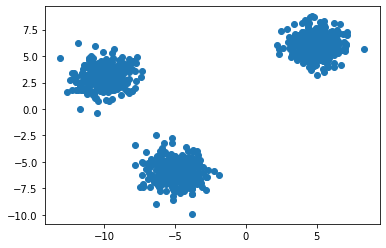

In [62]:
import matplotlib.pyplot as plt

plt.scatter(data[:,0],data[:,1])
plt.show()

### K-means clustering 알고리즘 구현

#### 1. random initialization

In [75]:
K=2
labels = np.random.randint(,K,data.shape[0])

In [76]:
labels

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,

In [78]:
def calculate_means(data, labels, K):
    means = []
    for i in range(K):
        mean_i_x = np.mean(data[labels==i,0])
        mean_i_y = np.mean(data[labels==i,1])
        means.append([mean_i_x,mean_i_y])
    means = np.array(means)
    return means

In [79]:
means = calculate_means(data,labels,K)

In [84]:
means

array([[-3.44792548,  1.17419795],
       [-3.21470351,  0.95957139]])

In [80]:
def assign_data(data, means):
    diff = data[:,None,:] - means[None,:,:] # (N,K,2)
    diff = np.mean(diff**2,-1) # (N,K)
    labels = np.argmin(diff,-1)
    return labels

In [81]:
labels = assign_data(data,means)

In [85]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [86]:
import matplotlib.pyplot as plt

def plot_cluster(data, labels, title=None):
    colors = ['orange','blue','green', 'gray', 'olive', 'red', 'purple', 'cyan']
    for i,c in enumerate(colors):
        data_i = data[labels==i]
        plt.scatter(data_i[:,0],data_i[:,1], c=colors[i])
        
    if title is not None:
        plt.title(title)
    plt.show()


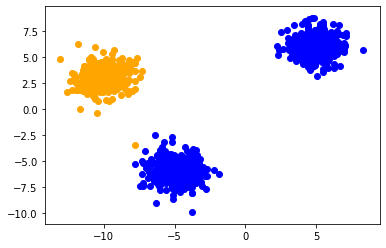

In [87]:
plot_cluster(data, labels)

#### clustering 모델 학습

In [88]:
n_iter = 20

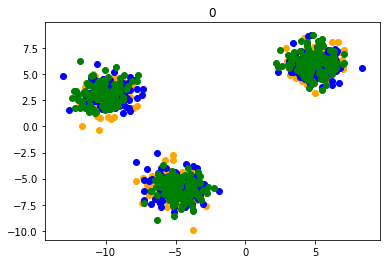

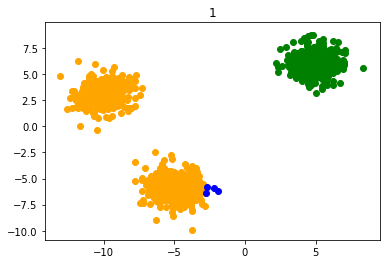

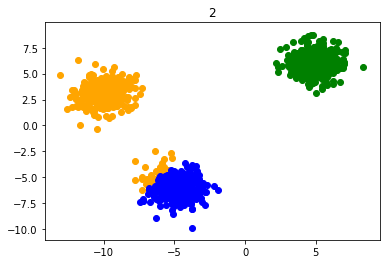

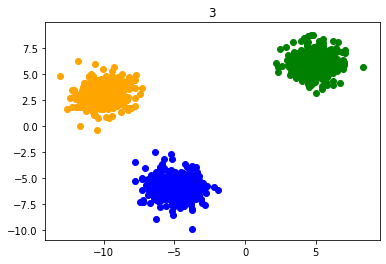

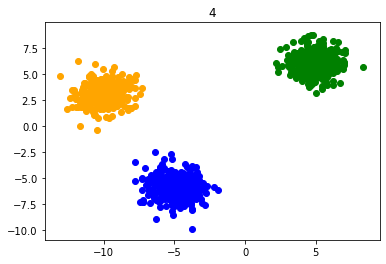

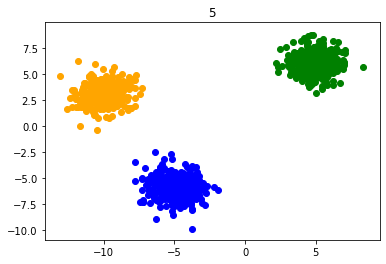

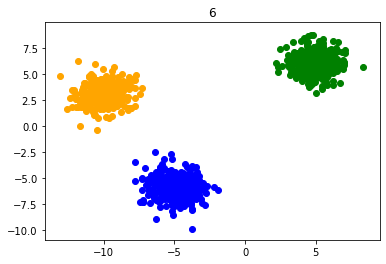

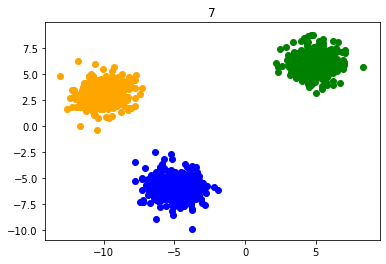

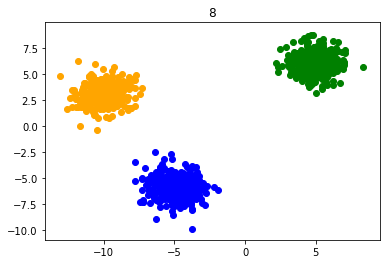

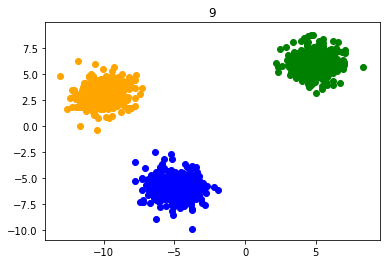

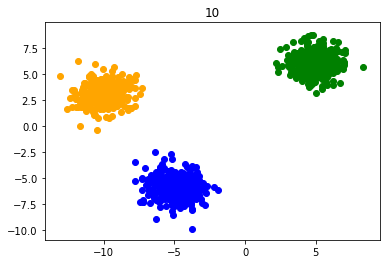

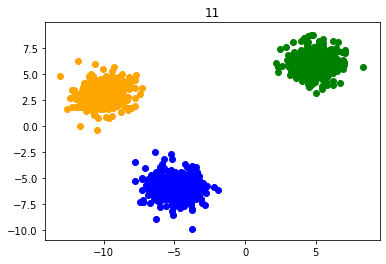

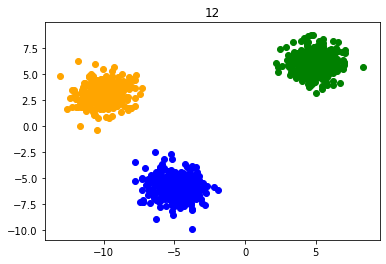

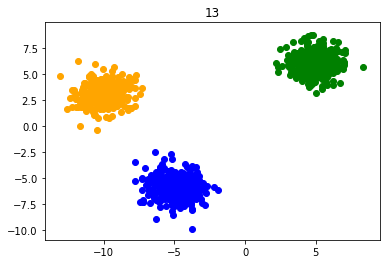

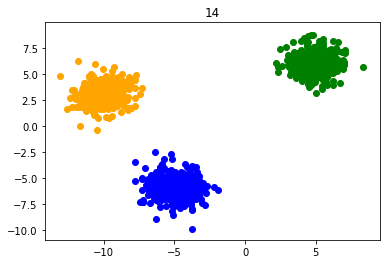

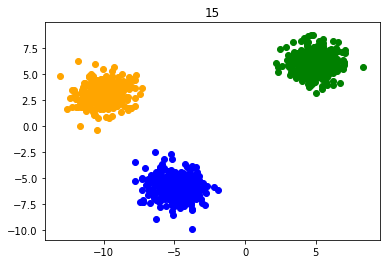

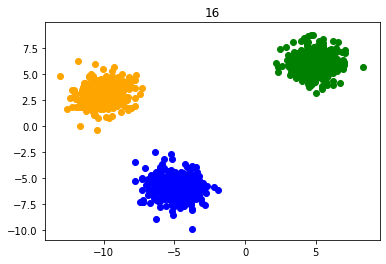

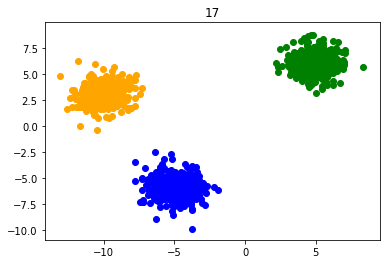

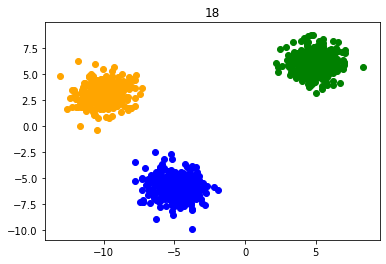

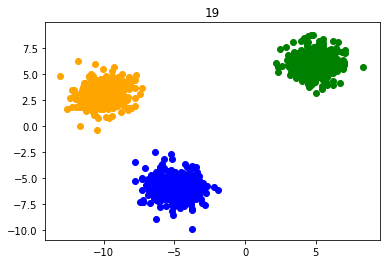

In [92]:
K=3
labels = np.random.randint(0,K,data.shape[0])

for i in range(n_iter):
    plot_cluster(data, labels, title=i)
    means = calculate_means(data,labels,K)
    labels = assign_data(data,means)

In [93]:
# 다른 데이터 형태를 클러스터링 해봅시다.
N = 1000
data = np.random.randn(N,2)

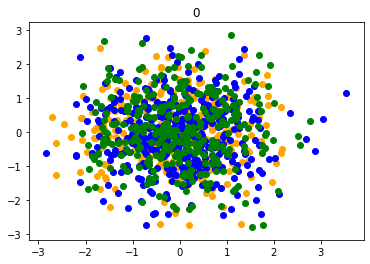

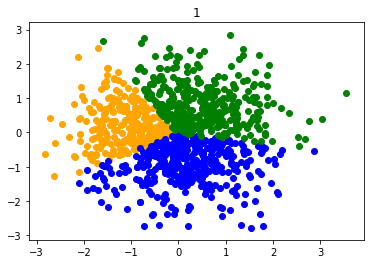

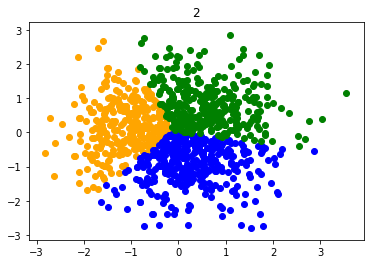

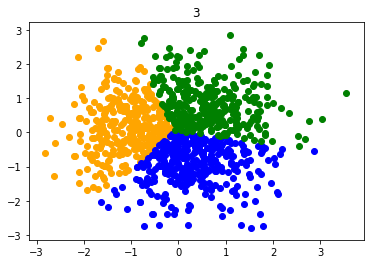

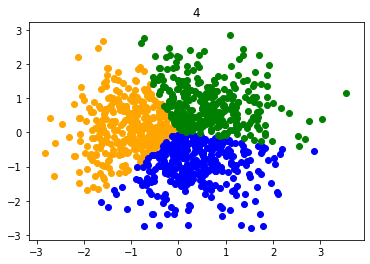

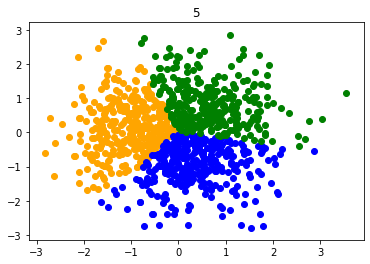

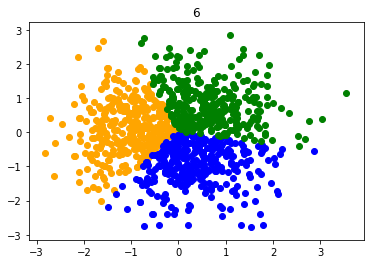

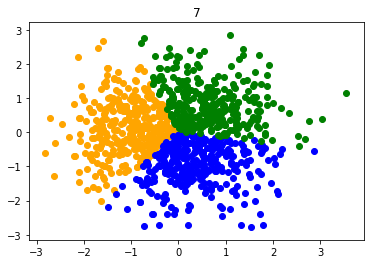

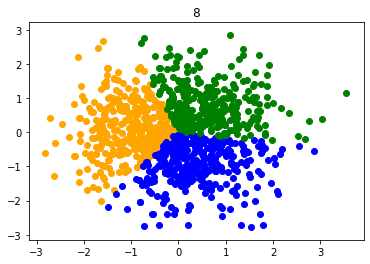

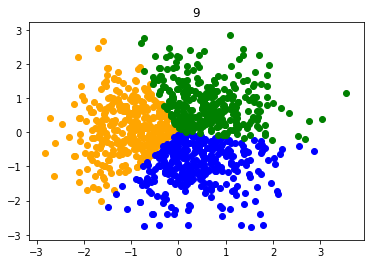

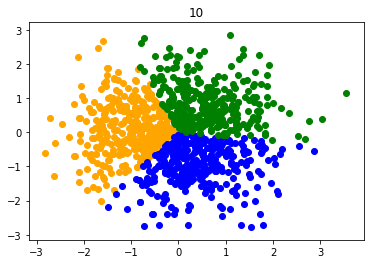

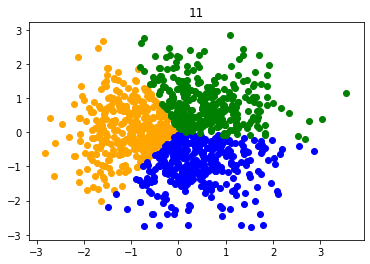

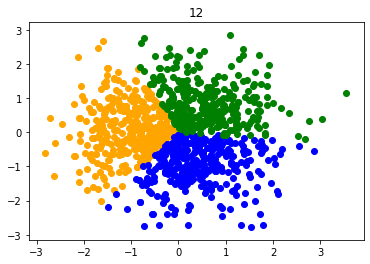

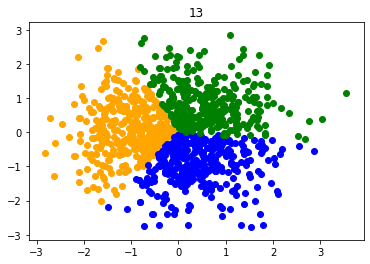

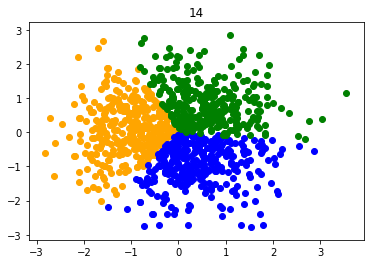

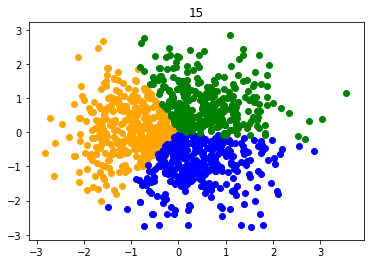

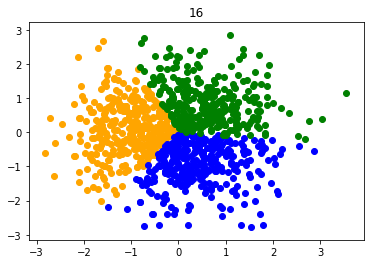

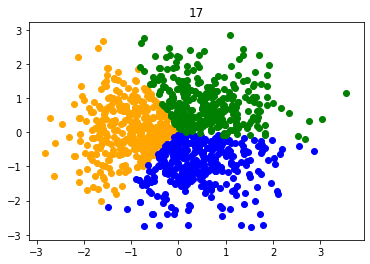

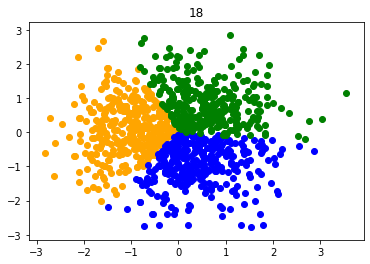

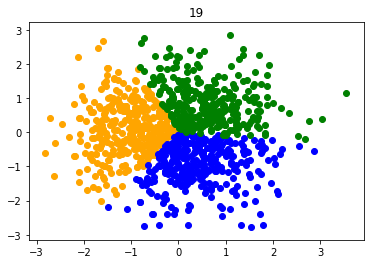

In [94]:
K=3
labels = np.random.randint(0,K,data.shape[0])

for i in range(n_iter):
    plot_cluster(data, labels, title=i)
    means = calculate_means(data,labels,K)
    labels = assign_data(data,means)

## Scikit-learn을 통한 clustering

### 토이 데이터셋 생성

In [100]:
from sklearn.datasets import make_blobs

# 데이터 샘플 생성
n_samples = 4000
n_components = 4

X, y_true = make_blobs(
    n_samples=n_samples, centers=n_components, cluster_std=0.60, random_state=0
)

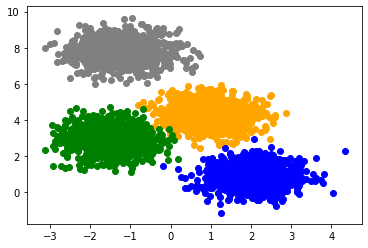

In [101]:
plot_cluster(X, y_true)

### 클러스터링 모델 학습

In [110]:
from sklearn.cluster import KMeans
# Calculate seeds from kmeans
model = KMeans(n_clusters=6, random_state=42)
y_pred = model.fit_predict(X)

### 클러스터링 결과 시각화

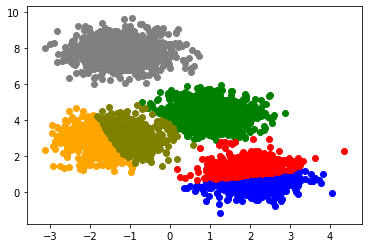

In [111]:
plot_cluster(X, y_pred)

 - 다른 데이터셋을 클러스터링해봅시다!

In [116]:
from sklearn.datasets import make_moons

X, y_true = make_moons(n_samples=3000, noise=0.05, random_state=42)

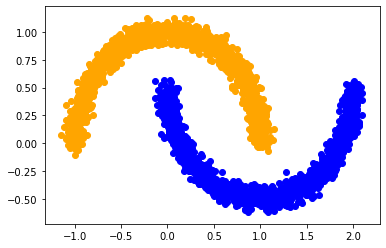

In [117]:
plot_cluster(X, y_true)

In [118]:
from sklearn.cluster import KMeans
# Calculate seeds from kmeans
model = KMeans(n_clusters=2, random_state=42)
y_pred = model.fit_predict(X)

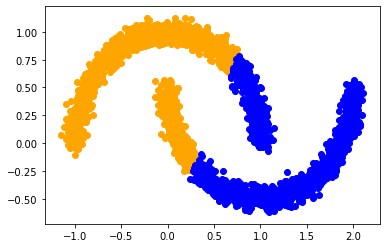

In [119]:
plot_cluster(X, y_pred)

In [120]:
from sklearn.datasets import make_circles

X, y_true = make_circles(n_samples=300)

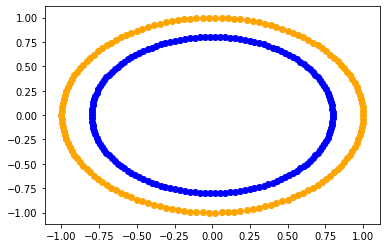

In [121]:
plot_cluster(X, y_true)

In [123]:
model = KMeans(n_clusters=2, random_state=42)
y_pred = model.fit_predict(X)

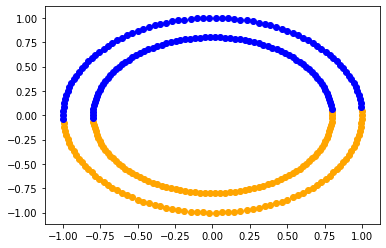

In [124]:
plot_cluster(X, y_pred)

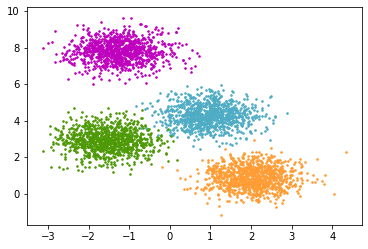

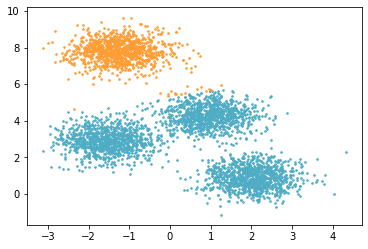

In [104]:
import matplotlib.pyplot as plt

# Plot init seeds along side sample data
plt.figure(1)
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]

# True
for k, col in enumerate(colors):
    cluster_data = y_true == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)
plt.show()

# Prediction
for k, col in enumerate(colors):
    cluster_data = y_pred == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=10)
plt.show()